Accuracy: 0.8033
Classification Report:
              precision    recall  f1-score   support

       anger       0.78      0.73      0.75        78
        fear       0.85      0.68      0.76        76
         joy       0.81      0.85      0.83       215
        love       0.79      0.82      0.80        45
     sadness       0.80      0.85      0.82       171
    surprise       0.67      0.53      0.59        15

    accuracy                           0.80       600
   macro avg       0.78      0.75      0.76       600
weighted avg       0.80      0.80      0.80       600



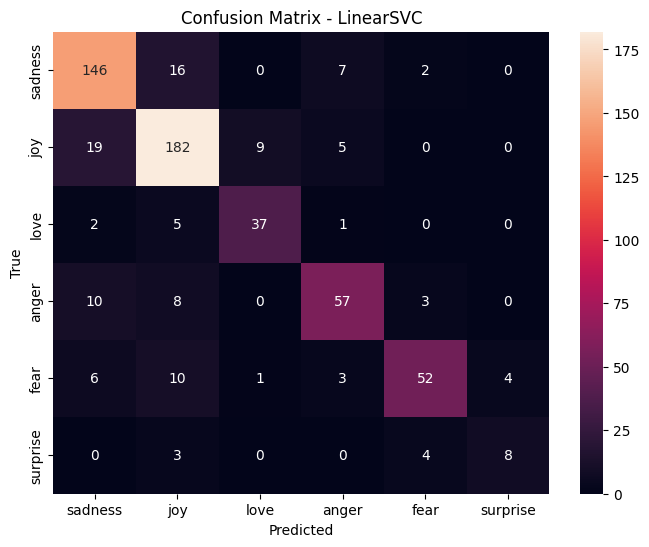

In [1]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/emotions (1).csv")  # Update path if needed
df = df.dropna(subset=["text", "label"])

# Map labels to emotion names
emotion_labels = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}
df['emotion'] = df['label'].map(emotion_labels)
df = df.dropna(subset=["emotion"])

# Optional: Use a sample of data for faster execution (increase if needed)
df = df.sample(n=3000, random_state=42)

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    filtered_words = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return " ".join(filtered_words)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Split dataset
X = df['clean_text']
y = df['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization (reduce max_features for speed)
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train and evaluate using LinearSVC (faster than SVC with linear kernel)
model = LinearSVC()
model.fit(X_train_tfidf, y_train)
predictions = model.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions, labels=list(emotion_labels.values()))
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=emotion_labels.values(), yticklabels=emotion_labels.values())
plt.title('Confusion Matrix - LinearSVC')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()